# Time Series with Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

/var/folders/09/sb1ltk754rvgdzk60z7z18400000gn/T/ipykernel_96671/3516498515.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ppg = pd.read_csv('../data/ieeeppg.csv', delimiter=';')
sensor = pd.read_csv('../data/sensor.csv')

In [3]:
ppg.head()

,PPG1,PPG2,x-accelerometer,y-accelerometer,z-accelerometer
0,"[-23.0, -24.0, -26.5, -27.0, -30.0, -30.0, -28...","[4.0, 6.0, 3.0, 3.5, 0.0, 2.0, 3.0, 3.5, 3.0, ...","[-0.0702, -0.0702, -0.054599999999999996, -0.0...","[0.3432, 0.3588, 0.3666, 0.3666, 0.37439999999...","[0.9593999999999999, 0.9438, 0.935999999999999..."
1,"[-20.5, -19.0, -20.0, -19.5, -20.5, -18.5, -19...","[-37.0, -38.5, -40.5, -41.5, -42.0, -41.0, -39...","[0.40559999999999996, 0.42119999999999996, 0.4...","[0.6083999999999999, 0.6162, 0.608399999999999...","[0.5147999999999999, 0.4992, 0.4758, 0.4602, 0..."
2,"[22.0, 23.5, 22.5, 23.5, 22.5, 21.5, 20.5, 19....","[12.5, 13.5, 11.5, 13.5, 13.5, 12.5, 11.5, 11....","[0.4758, 0.4758, 0.4758, 0.46799999999999997, ...","[0.6864, 0.6864, 0.6864, 0.6786, 0.6864, 0.686...","[0.38999999999999996, 0.38999999999999996, 0.3..."
3,"[-5.5, -5.5, -6.5, -6.5, -7.0, -7.0, -6.5, -7....","[-1.0, -0.5, -1.5, -1.0, 0.0, -0.5, -0.5, -1.0...","[0.4602, 0.4602, 0.4602, 0.4602, 0.4602, 0.452...","[0.6708, 0.6786, 0.6708, 0.6708, 0.6786, 0.686...","[0.3978, 0.4134, 0.40559999999999996, 0.405599..."
4,"[30.5, 27.0, 26.0, 24.0, 21.5, 20.5, 18.0, 16....","[74.5, 70.0, 67.0, 62.5, 57.5, 54.0, 49.5, 44....","[0.6162, 0.6162, 0.624, 0.6083999999999999, 0....","[0.7098, 0.6941999999999999, 0.6786, 0.6708, 0...","[0.3978, 0.38999999999999996, 0.37439999999999..."


Nos encontramos con una tabla de listas. Cada fila dentro de la tabla PPG es un paciente.

In [4]:
ppg['PPG1'][0] #esto es el primer paciente

'[-23.0, -24.0, -26.5, -27.0, -30.0, -30.0, -28.5, -28.0, -29.0, -29.0, -27.0, -24.5, -23.5, -23.0, -21.5, -19.0, -17.5, -17.5, -15.0, -16.0, -14.0, -13.5, -14.0, -13.0, -14.0, -14.5, -15.5, -16.5, -18.0, -20.5, -19.5, -20.0, -23.5, -24.0, -26.0, -25.5, -26.0, -28.0, -29.5, -31.0, -30.5, -31.5, -34.0, -36.0, -37.5, -38.0, -39.0, -41.0, -41.0, -42.0, -41.5, -41.0, -41.5, -40.5, -40.0, -36.5, -37.0, -34.5, -33.5, -31.5, -28.5, -27.5, -27.0, -25.5, -25.0, -22.5, -21.5, -20.5, -17.0, -15.0, -11.0, -8.5, -5.0, 0.0, 5.5, 11.5, 18.5, 24.5, 31.0, 38.5, 44.0, 50.5, 55.5, 58.0, 61.0, 62.5, 65.5, 65.0, 63.5, 63.0, 63.0, 62.0, 59.0, 57.5, 54.5, 54.0, 51.5, 47.5, 45.0, 41.0, 38.5, 34.5, 31.5, 28.5, 24.5, 21.0, 16.5, 14.5, 12.0, 7.0, 7.0, 3.5, 1.5, 0.5, -1.0, -1.0, -1.0, -0.5, -1.5, -1.0, -0.5, -0.5, -0.5, 0.0, -2.0, 0.0, -2.0, -2.5, -2.0, -3.5, -3.0, -4.0, -3.5, -4.5, -7.0, -6.5, -8.0, -9.5, -11.0, -13.5, -14.0, -15.5, -18.0, -19.0, -19.5, -21.5, -22.0, -23.5, -24.0, -24.5, -25.5, -24.5, -24.5, -24

Pero si vemos bien.. encontramos que esta lista es un string, tenemos que transformar a número.

Para esto podemos utilizar la libreria 'json'

In [5]:
for c in ppg.columns:
    ppg[c] = ppg[c].apply(json.loads)

In [6]:
ppg.dtypes

PPG1               object
PPG2               object
x-accelerometer    object
y-accelerometer    object
z-accelerometer    object
dtype: object

### Different Heart beat sensors on same subject

Ahora queremos crear una gráfica de los diferentes sensores pero solamente para el paciente 1.

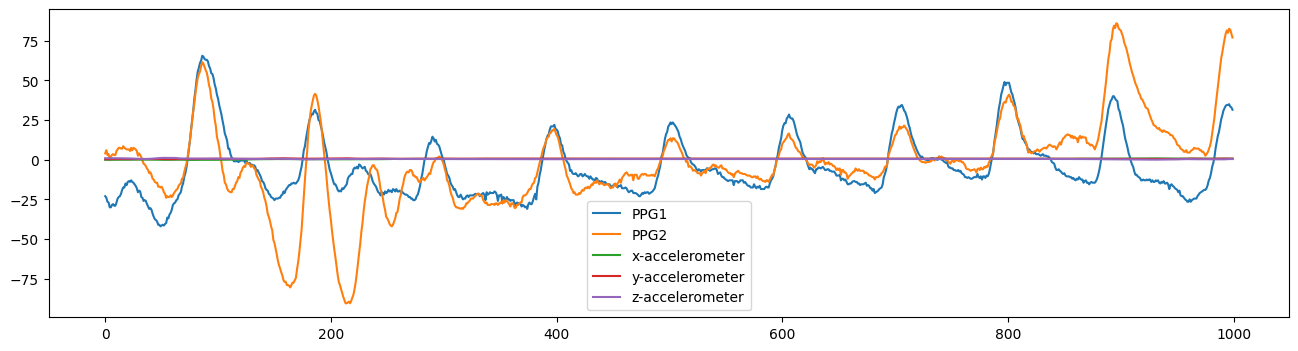

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
patient=ppg.iloc[0] #fijamos el primer paciente
for col in ppg.columns:
    ax.plot(patient[col], label=col)
ax.legend()
plt.show()

Los datos tienen diferentes escalas, los valores de PPG1 son muy grandes en comparación de los acelerómetros.

# Exploratory Data Analysis (EDA)
Ahora vamos a graficar de otra manera para entender mejor cómo se mueven los datos. Anteriormente vemos que debido a los rangos no se observa bien la gráfica, por lo tanto podemos realizar una normalización o también graficar independientemente cada gráfica.

In [8]:
import scipy

Se grafica los sensores para el primer paciente aplicando el z-score:

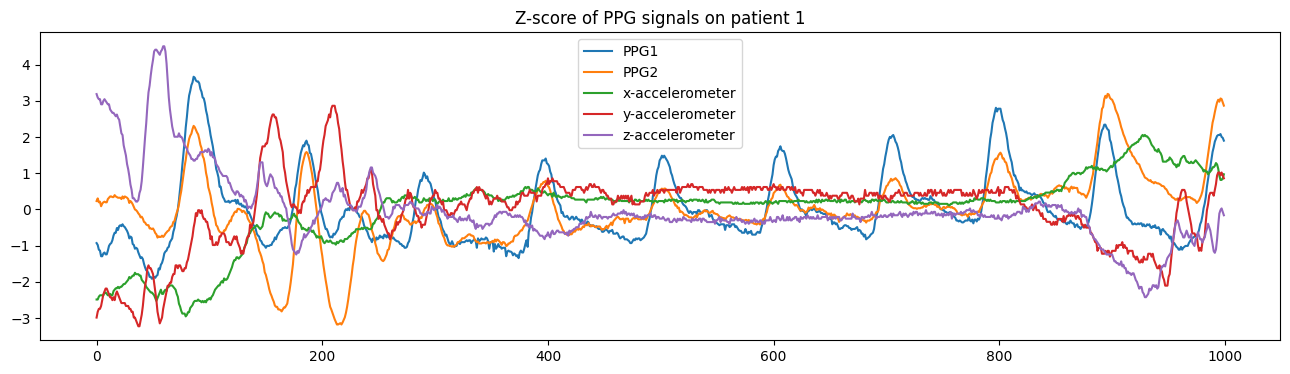

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
patient=ppg.iloc[0] #fijamos el primer paciente
for col in ppg.columns:
    ax.plot(scipy.stats.zscore(patient[col]), label=col)
ax.legend()
ax.set_title('Z-score of PPG signals on patient 1')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()

Hay que tener en cuenta:

Patient -> la primera fila de los datos
`patient=df.iloc[0]`-> y esto es un `pd.Series``

Yo quiero transformar los datos de patient, es decir aplicar algo a `patient["PPG1"]`

Pero la función que apliquemos requiere una matriz y no una lista, por esto es importante convertir la lista a una matriz de 1 columna. Aquí es donde entra numpy y reshape.

`np.array(patient["PPG1"]).reshape(-1,1)` -> -1 le dice que todas las filas

Otra forma es hacer la transpuesta:

`np.array(patient["PPG1"]).T` -> porque antes de transponer tenemos una matriz de 1 x 100 y al transponer queda de 100x1

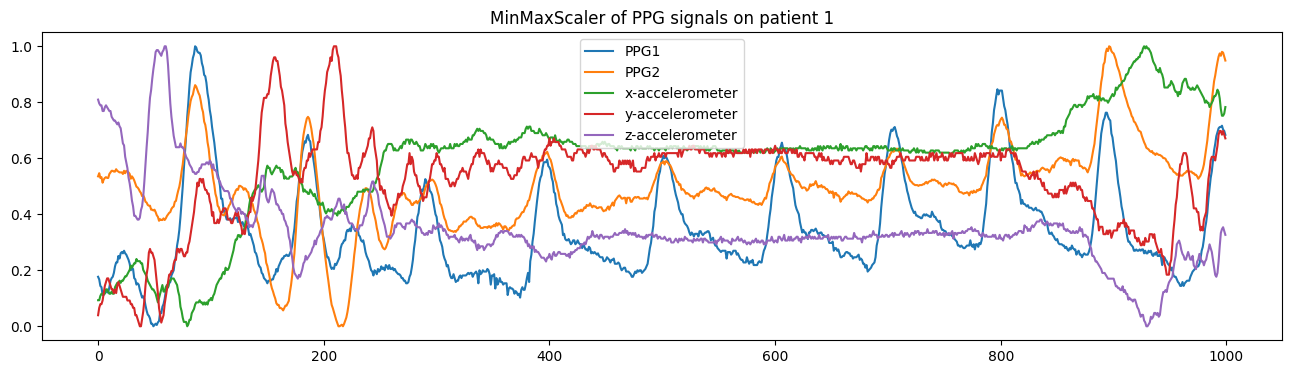

In [11]:
fig, ax = plt.subplots(figsize=(16,4))
patient = ppg.iloc[0] #fijamos el primer paciente
for col in ppg.columns:
    normalized_ppg = scaler.fit_transform(np.array(patient[col]).reshape(-1, 1))
    ax.plot(normalized_ppg, label=col)
ax.legend()
ax.set_title('MinMaxScaler of PPG signals on patient 1')
plt.show()

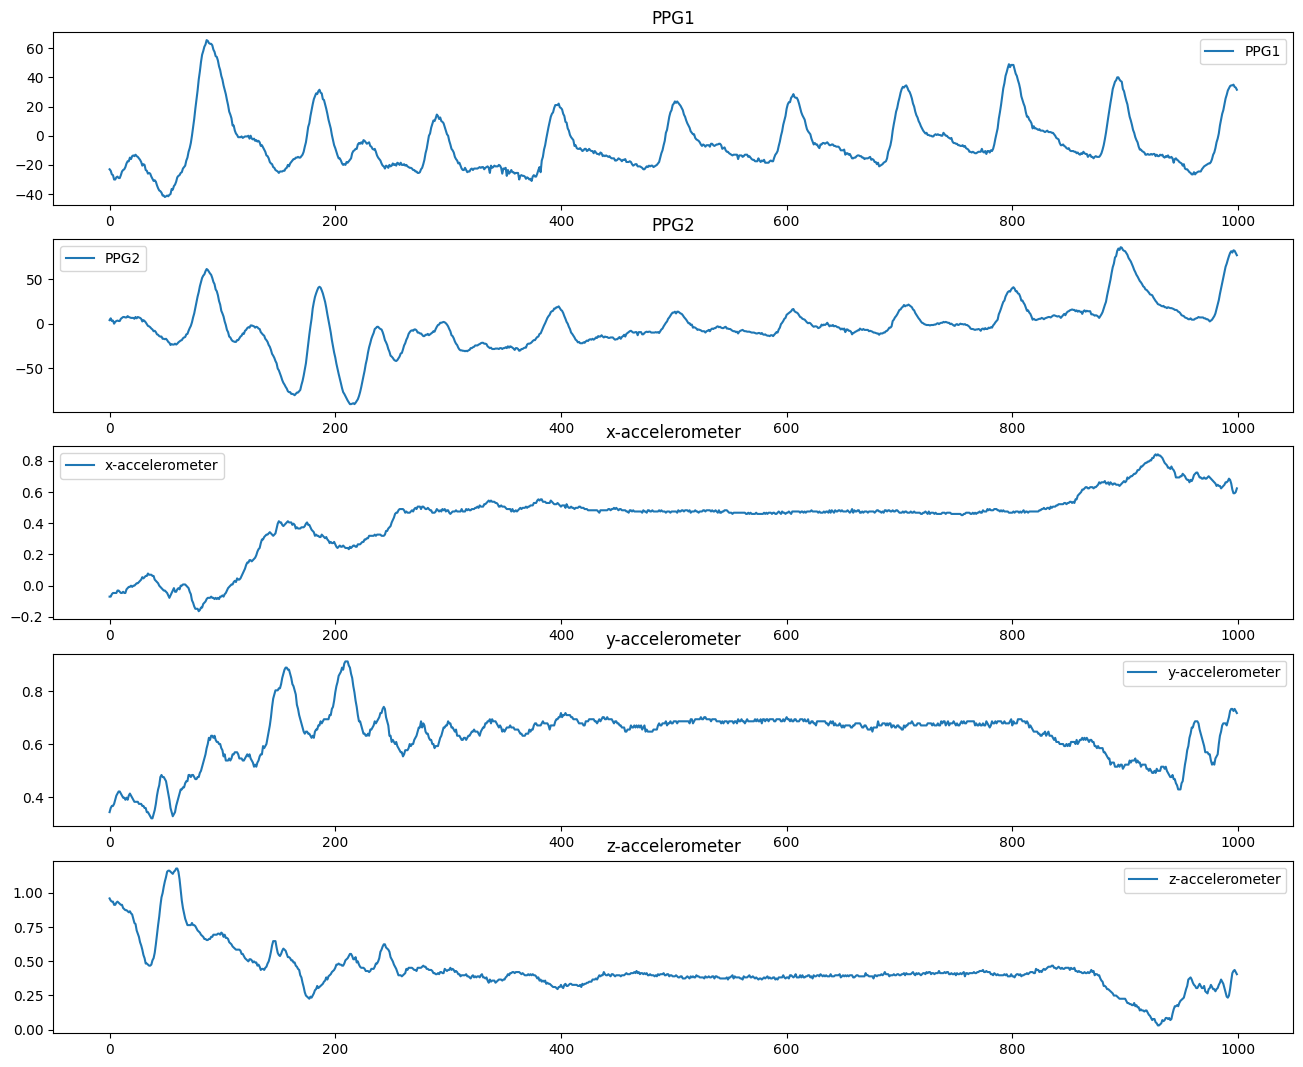

In [12]:
fig, axs = plt.subplots(len(ppg.columns), figsize=(16, 13))
patient = ppg.iloc[0] #fijamos el primer paciente
for i, col in enumerate(ppg.columns):
    axs[i].plot(patient[col], label=col)
    axs[i].set_title(col)
    axs[i].legend()

plt.show()

### Missing values
Ahora vamos a enfocarnos en los missing values del paciente 1.

In [14]:
df_patient1=pd.read_csv('../data/ieeeppg_patient1_missing_data.csv', delimiter=',')

In [15]:
df_patient1.head()

,PPG1,PPG2,x-accelerometer,y-accelerometer,z-accelerometer
0,-23.0,4.0,-0.0702,0.3432,0.9594
1,-24.0,6.0,-0.0702,0.3588,0.9438
2,-26.5,3.0,-0.0546,0.3666,0.9360
3,-27.0,3.5,-0.0468,0.3666,0.9360
4,-30.0,0.0,-0.0468,0.3744,0.9126


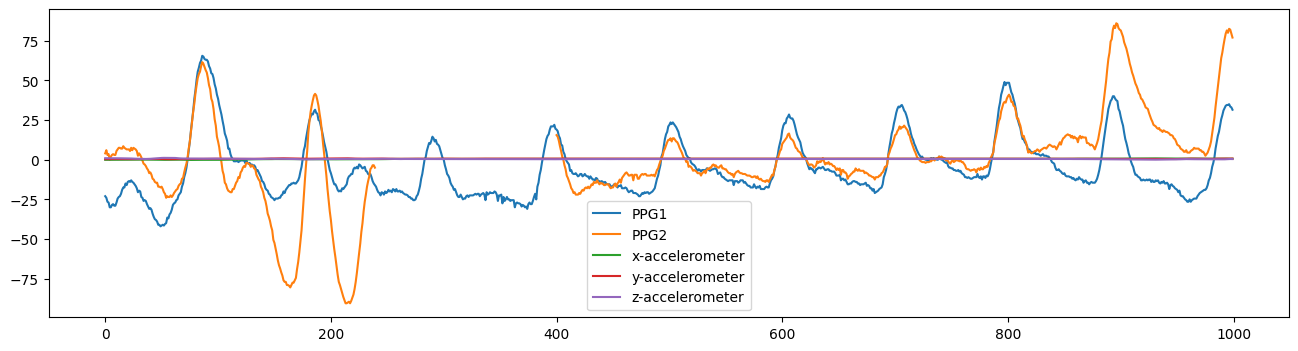

In [16]:
fig, ax = plt.subplots(figsize=(16,4))
for col in df_patient1.columns:
    ax.plot(df_patient1[col], label=col)
ax.legend()
plt.show()

En el grafico anterior observamos que no hay varios valores para PPG2, al normalizarlo con zscore encontramos:

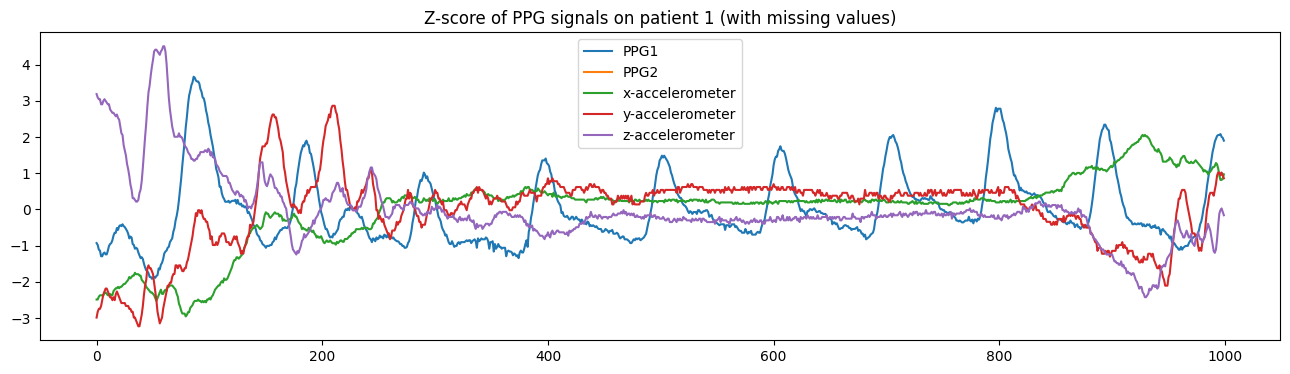

In [17]:
fig, ax = plt.subplots(figsize=(16,4))
for col in df_patient1.columns:
    ax.plot(scipy.stats.zscore(df_patient1[col]), label=col)
ax.legend()
ax.set_title('Z-score of PPG signals on patient 1 (with missing values)')
plt.show()

Scipy encuentra los NaN y no lo soporta, así que lo elimina toda la columna, mientras que sklearn si lo soporta:

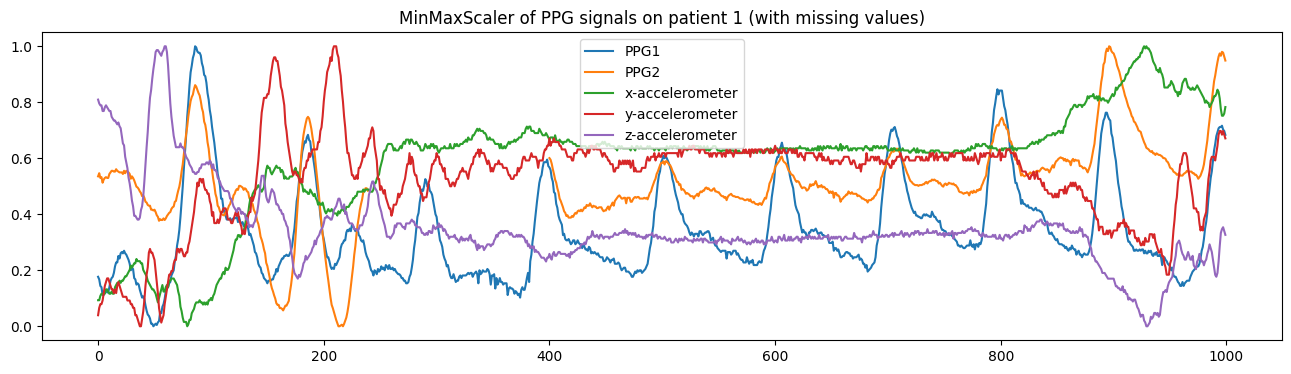

In [18]:
fig, ax = plt.subplots(figsize=(16,4))

for col in df_patient1.columns:
    normalized_ppg = scaler.fit_transform(np.array(df_patient1[col]).reshape(-1, 1))
    ax.plot(normalized_ppg, label=col)
ax.legend()
ax.set_title('MinMaxScaler of PPG signals on patient 1 (with missing values)')
plt.show()

Se observa nuevamente que hay un rango de tiempo en el cual PPG2 no tiene valores, si lo ponemos mas claro:


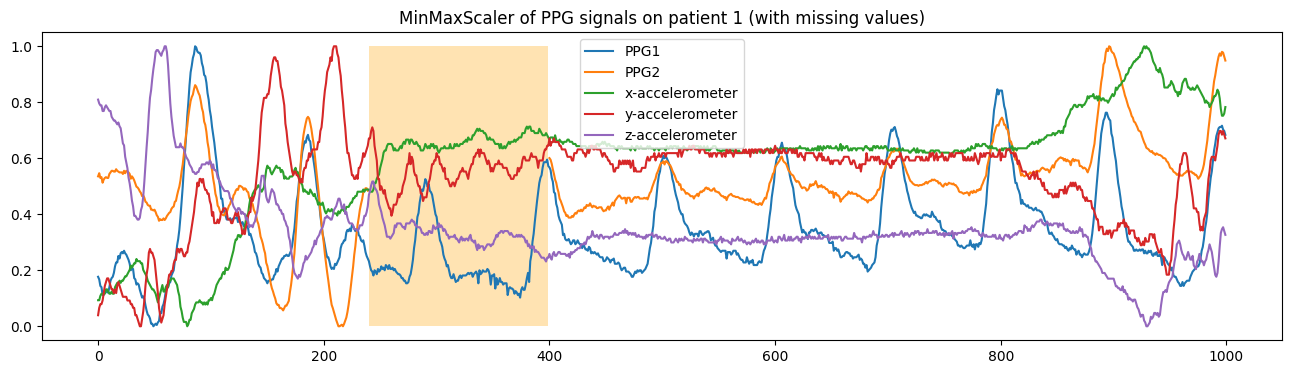

In [19]:
fig, ax = plt.subplots(figsize=(16,4))

for col in df_patient1.columns:
    normalized_ppg = scaler.fit_transform(np.array(df_patient1[col]).reshape(-1, 1))
    ax.plot(normalized_ppg, label=col)
    
# Add a square using fill_between for NaN values in PPG2
nan_indices = np.isnan(df_patient1['PPG2'])
ax.fill_between(np.arange(len(df_patient1)), 0, 1, where=nan_indices, facecolor='orange', alpha=0.3)

ax.legend()
ax.set_title('MinMaxScaler of PPG signals on patient 1 (with missing values)')
plt.show()